### Get the data from onedrive

In [1]:
!wget "https://iitbacin-my.sharepoint.com/:u:/g/personal/22d0378_iitb_ac_in/EYDfC212kCtIjQ4i6H7A6-kBXpgr1QdYywI_H7K3YlDG0w?e=Tu56i7&download=1"

--2023-11-13 03:38:14--  https://iitbacin-my.sharepoint.com/:u:/g/personal/22d0378_iitb_ac_in/EYDfC212kCtIjQ4i6H7A6-kBXpgr1QdYywI_H7K3YlDG0w?e=Tu56i7&download=1
Resolving iitbacin-my.sharepoint.com (iitbacin-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to iitbacin-my.sharepoint.com (iitbacin-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/22d0378_iitb_ac_in/Documents/CS337_course_project_ALML/A%20Video%20Dataset%20-001.zip?ga=1 [following]
--2023-11-13 03:38:14--  https://iitbacin-my.sharepoint.com/personal/22d0378_iitb_ac_in/Documents/CS337_course_project_ALML/A%20Video%20Dataset%20-001.zip?ga=1
Reusing existing connection to iitbacin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 3372408794 (3.1G) [application/x-zip-compressed]
Saving to: ‘EYDfC212kCtIjQ4i6H7A6-kBXpgr1QdYywI_H7K3YlDG0w?e=Tu56i7&download=1’

EYDfC212kCtIjQ4i6H7 100%[=========

In [4]:
!mv EYDfC212kCtIjQ4i6H7A6-kBXpgr1QdYywI_H7K3YlDG0w?e=Tu56i7\&download=1 ISL_dataset_AIML.zip

In [6]:
!unzip ISL_dataset_AIML.zip

Archive:  ISL_dataset_AIML.zip
  inflating: A Video Dataset of the Hand Gestures of Indian Sign Language Words used in Emergency Situations/Cropped_Data/accident_Cropped.zip  
  inflating: A Video Dataset of the Hand Gestures of Indian Sign Language Words used in Emergency Situations/Cropped_Data/call_Cropped.zip  
  inflating: A Video Dataset of the Hand Gestures of Indian Sign Language Words used in Emergency Situations/Cropped_Data/doctor_Cropped.zip  
  inflating: A Video Dataset of the Hand Gestures of Indian Sign Language Words used in Emergency Situations/Cropped_Data/help_Cropped.zip  
  inflating: A Video Dataset of the Hand Gestures of Indian Sign Language Words used in Emergency Situations/Cropped_Data/hot_Cropped.zip  
  inflating: A Video Dataset of the Hand Gestures of Indian Sign Language Words used in Emergency Situations/Cropped_Data/lose_Cropped.zip  
  inflating: A Video Dataset of the Hand Gestures of Indian Sign Language Words used in Emergency Situations/Cropped_D

In [9]:
!mv A\ Video\ Dataset\ of\ the\ Hand\ Gestures\ of\ Indian\ Sign\ Language\ Words\ used\ in\ Emergency\ Situations Dataset

In [14]:
!ls

code.ipynb  Dataset  ISL_dataset_AIML.zip


In [16]:
import zipfile
import os

# Specify the folder containing the zip files
folder_path = './Dataset/Cropped_Data'

# List all the files in the folder
file_list = os.listdir(folder_path)
file_list

['pain_Cropped.zip',
 'hot_Cropped.zip',
 'doctor_Cropped.zip',
 'thief_Cropped.zip',
 'accident_Cropped.zip',
 'call_Cropped.zip',
 'help_Cropped.zip',
 'lose_Cropped.zip']

In [36]:
for file_name in file_list:
    if file_name.endswith('.zip'):
        file_path = os.path.join(folder_path, file_name)

        # Create a directory to extract the contents
        # extraction_path = os.path.join(folder_path, file_name[:-4])  # Remove '.zip' extension
        # os.makedirs(extraction_path, exist_ok=True)
        extraction_path = folder_path

        # Unzip the file
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(extraction_path)
            print(file_path)
           # os.remove(file_path)#also remove the zip file after extraction 
            

        print(f'Unzipped {file_name} to {extraction_path}')
        

FileNotFoundError: [Errno 2] No such file or directory: './Dataset/Cropped_Data/pain_Cropped.zip'

### Extract Frames

In [39]:
path2data = "./Dataset"
sub_folder = "Cropped_Data"
sub_folder_jpg = "Cropped_Frames"
path2vids = os.path.join(path2data, sub_folder)

files = os.listdir(path2vids)

listOfCats = [name.split('_')[0] for name in files if '.zip' not in name]
listOfCats, len(listOfCats)

(['help', 'doctor', 'call', 'pain', 'accident', 'lose', 'hot', 'thief'], 8)

In [40]:
for cat in listOfCats:
    print("category:", cat)
    category =  cat + '_Cropped'
    path2cat = os.path.join(path2vids, category)
    listOfvids = os.listdir(path2cat)
    print(f"%d videos" % len(listOfvids))
    print("-"*25)

category: help
52 videos
-------------------------
category: doctor
52 videos
-------------------------
category: call
52 videos
-------------------------
category: pain
52 videos
-------------------------
category: accident
52 videos
-------------------------
category: lose
50 videos
-------------------------
category: hot
52 videos
-------------------------
category: thief
50 videos
-------------------------


In [49]:
!pip install opencv-python numpy matplotlib

You should consider upgrading via the '/home/roy/.pyenv/versions/3.10.2/envs/ai_ml_lab/bin/python3.10 -m pip install --upgrade pip' command.


In [42]:
import cv2
import numpy as np

In [45]:
def get_frames(filename, n_frames= 1):
    frames = []
    v_cap = cv2.VideoCapture(filename)
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_list= np.linspace(0, v_len-1, n_frames+1, dtype=np.int16)

    for fn in range(v_len):
        success, frame = v_cap.read()
        if success is False:
            continue
        if (fn in frame_list):
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
    v_cap.release()
    return frames, v_len

def store_frames(frames, path2store):
    for ii, frame in enumerate(frames):
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        path2img = os.path.join(path2store, "frame"+str(ii)+".jpg")
        cv2.imwrite(path2img, frame)

### Extract one video

In [53]:
path2vido = "./Dataset/Cropped_Data/thief_Cropped/thief_Crop_026_02.avi"
frames, v_len = get_frames(path2vido, n_frames=16)
len(frames), v_len

(17, 77)

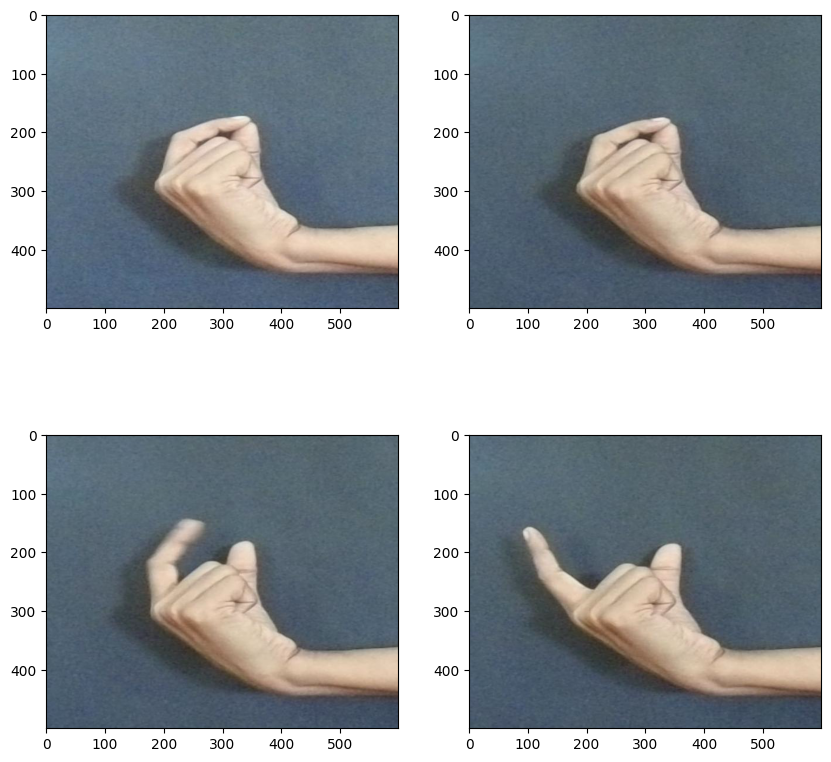

In [58]:
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
num_subplots = min(4, len(frames[::4]))  # Ensure you create at most 4 subplots
#what about if the live video the user doest the handsigns slowly=====================================add the question 
for i in range(num_subplots):
    plt.subplot(2, 2, i + 1)
    plt.imshow(frames[i * 4])  # Display every 4th frame


In [60]:
extension = ".avi"
n_frames = 16 #proposed to change it to 8 but maybe capturing the complete picture in 16 only, to change first remove then change
for root, dirs, files in os.walk(path2vids, topdown=False):
    for name in files:
        if extension not in name:
            continue
        path2video = os.path.join(root, name)
        frames, vlen = get_frames(path2video, n_frames= n_frames)
        path2store = path2video.replace(sub_folder, sub_folder_jpg)
        path2store = path2store.replace(extension, "")
        print(path2store)
        os.makedirs(path2store, exist_ok= True)
        store_frames(frames, path2store)
    print("-"*50)

./Dataset/Cropped_Frames/help_Cropped/help_Crop_018_02
./Dataset/Cropped_Frames/help_Cropped/help_Crop_009_02
./Dataset/Cropped_Frames/help_Cropped/help_Crop_011_01
./Dataset/Cropped_Frames/help_Cropped/help_Crop_024_01
./Dataset/Cropped_Frames/help_Cropped/help_Crop_008_02
./Dataset/Cropped_Frames/help_Cropped/help_Crop_003_02
./Dataset/Cropped_Frames/help_Cropped/help_Crop_026_01
./Dataset/Cropped_Frames/help_Cropped/help_Crop_002_02
./Dataset/Cropped_Frames/help_Cropped/help_Crop_013_02
./Dataset/Cropped_Frames/help_Cropped/help_Crop_019_01
./Dataset/Cropped_Frames/help_Cropped/help_Crop_020_02
./Dataset/Cropped_Frames/help_Cropped/help_Crop_018_01
./Dataset/Cropped_Frames/help_Cropped/help_Crop_023_02
./Dataset/Cropped_Frames/help_Cropped/help_Crop_013_01
./Dataset/Cropped_Frames/help_Cropped/help_Crop_025_02
./Dataset/Cropped_Frames/help_Cropped/help_Crop_011_02
./Dataset/Cropped_Frames/help_Cropped/help_Crop_025_01
./Dataset/Cropped_Frames/help_Cropped/help_Crop_010_02
./Dataset/